In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
#開啟檔案
dataset = files.upload() # upload local files

Saving u.item to u (1).item
Saving u2.base to u2.base
Saving u2.test to u2.test
Saving u3.base to u3.base
Saving u3.test to u3.test
Saving u4.base to u4.base
Saving u4.test to u4.test


In [ ]:
#train data
from numpy.core.fromnumeric import shape
rating_header = ["user_id", "item_id", "rating", "timestamp"]
rating = pd.read_csv("u2.base", sep = '\t', header = None, names=rating_header)
rating.head()

,user_id,item_id,rating,timestamp
0,1,3,4,878542960
1,1,4,3,876893119
2,1,5,3,889751712
3,1,6,5,887431973
4,1,7,4,875071561


In [ ]:
#test data
rating_header = ["user_id", "item_id", "rating", "timestamp"]
rating1 = pd.read_csv("u2.test", sep = '\t', header = None, names=rating_header)
rating1.head()

,user_id,item_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,8,1,875072484
3,1,9,5,878543541
4,1,21,1,878542772


In [ ]:
#movie 的內容
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv("u.item", sep = '|', header = None, encoding = 'latin1', names = movie_header)
# remove the video release date (no values)
movies = movies.drop(columns=["release_date", "video_release_date", "IMDb_URL"])#刪除不必要的項
movies.head()

,item_id,title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
import numpy as np
df = pd.merge(rating, movies, on='item_id', how='inner')
df.head()

,user_id,item_id,rating,timestamp,title,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,3,4,878542960,Four Rooms (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,49,3,3,888068877,Four Rooms (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,62,3,3,879372325,Four Rooms (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,63,3,2,875748068,Four Rooms (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,81,3,4,876592546,Four Rooms (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#建立df為新的資料集
df = df.drop(columns=["timestamp", "title", "item_id"])
df.head()

,user_id,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,49,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,62,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,63,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,81,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#在這裡我們產生一個新的dataframe data
#包含每個user對每個不同rating的次數以及content的次數
data = pd.DataFrame()
for i in sorted(df['user_id'].unique()):
  m = df[df['user_id']==i]
  for j in range(1,6):
    v = m[m['rating']==j]
    v1 = v.sum()
    v1['user_id'] = i
    v1['rating'] = j
    v1['times'] = v['rating'].count()
    v2 = pd.DataFrame(v1).T
    data = data.append(v2)

In [ ]:
#做smooth
data1 = data.copy().T
data1[2:] = data1[2:]+1
data1 = data1.T
data1.head(10)

,user_id,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,times
0,1.0,1.0,1.0,9.0,10.0,2.0,9.0,10.0,5.0,1.0,...,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,21.0
0,1.0,2.0,1.0,9.0,5.0,3.0,5.0,6.0,2.0,1.0,...,1.0,2.0,3.0,1.0,5.0,5.0,7.0,2.0,1.0,23.0
0,1.0,3.0,1.0,16.0,8.0,4.0,3.0,18.0,6.0,1.0,...,1.0,5.0,2.0,2.0,8.0,3.0,12.0,6.0,4.0,43.0
0,1.0,4.0,2.0,19.0,10.0,3.0,4.0,20.0,8.0,1.0,...,1.0,5.0,6.0,1.0,10.0,12.0,16.0,8.0,3.0,69.0
0,1.0,5.0,1.0,13.0,6.0,3.0,2.0,23.0,6.0,3.0,...,1.0,3.0,2.0,3.0,14.0,15.0,11.0,5.0,2.0,67.0
0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0
0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,2.0,3.0,1.0,3.0,1.0,1.0,2.0,4.0,3.0,1.0,...,1.0,3.0,2.0,3.0,4.0,2.0,5.0,1.0,1.0,14.0
0,2.0,4.0,1.0,3.0,3.0,1.0,2.0,7.0,2.0,1.0,...,2.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,1.0,16.0
0,2.0,5.0,1.0,4.0,2.0,1.0,1.0,3.0,4.0,1.0,...,2.0,1.0,1.0,2.0,5.0,2.0,4.0,2.0,1.0,12.0


In [ ]:
data1['sum'] = data1.T[2:-2].sum()

data1

,user_id,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,times,sum
0,1.0,1.0,1.0,9.0,10.0,2.0,9.0,10.0,5.0,1.0,...,2.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,21.0,67.0
0,1.0,2.0,1.0,9.0,5.0,3.0,5.0,6.0,2.0,1.0,...,2.0,3.0,1.0,5.0,5.0,7.0,2.0,1.0,23.0,66.0
0,1.0,3.0,1.0,16.0,8.0,4.0,3.0,18.0,6.0,1.0,...,5.0,2.0,2.0,8.0,3.0,12.0,6.0,4.0,43.0,110.0
0,1.0,4.0,2.0,19.0,10.0,3.0,4.0,20.0,8.0,1.0,...,5.0,6.0,1.0,10.0,12.0,16.0,8.0,3.0,69.0,161.0
0,1.0,5.0,1.0,13.0,6.0,3.0,2.0,23.0,6.0,3.0,...,3.0,2.0,3.0,14.0,15.0,11.0,5.0,2.0,67.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,943.0,1.0,1.0,7.0,7.0,1.0,3.0,9.0,1.0,1.0,...,1.0,1.0,1.0,5.0,5.0,1.0,3.0,4.0,18.0,55.0
0,943.0,2.0,1.0,6.0,5.0,1.0,2.0,18.0,4.0,1.0,...,4.0,2.0,1.0,8.0,3.0,5.0,2.0,2.0,28.0,71.0
0,943.0,3.0,1.0,12.0,5.0,2.0,4.0,9.0,1.0,1.0,...,4.0,2.0,2.0,7.0,9.0,6.0,3.0,3.0,29.0,80.0
0,943.0,4.0,1.0,33.0,18.0,2.0,4.0,16.0,6.0,1.0,...,5.0,1.0,3.0,12.0,7.0,20.0,8.0,4.0,63.0,162.0


In [ ]:
#做貝式定理去分析每個不同的rating的可能性
def probability(u,mov):
  p_rating = 0
  p = 0
  t_times = data1[data1['user_id']==u]['times'].sum()
  for i in range(5):
    s_p = (data1.iloc[(u-1)*5+i]['times']/t_times)**2
    
    for j in movies.loc[mov-1][movies.loc[mov-1]!=0][2:].index:
      s_p = s_p * (data1.iloc[(u-1)*5+i][j]/data1.iloc[(u-1)*5+i]['sum'])
      
    if s_p>p:
      p_rating = i+1
      p = s_p
  return p_rating, p

In [ ]:
#計算MSE
c = 0
mse = 0
for i in range(len(rating1.index)):
  user,item,r,times = rating1.iloc[i]
  p_rating, p_pro = probability(user,item)
  if(p_rating==r):
    c = c+1
  mse = mse + (p_rating-r)**2

print(c)
print(mse)

7936
29211


In [ ]:
c = 0
for i in range(len(rating1.index)):
  c = c+1
print(c)

20000


#實驗結果(RMSE)


1.   1.245
2.   1.229
3.   1.210
4.   1.205
5.   1.218

a.   1.230
b.   1.253
#實驗結論
我們在之前做了uesrbase與itembase實驗，我們發現因為資料中每個不同使用者的評分次數並不平均，次數也不夠多，所以導致我們在做相似矩陣時並不太準確，如果要提高準確率的話又必須要參考更大量的資料，導致運算量過大。所以想試試看contentbase，使用內容來降低維度，再用貝式定理運算後來做分類。我們的實驗結果其實相比起之前的方法來的更不好，我們推測有兩點的原因
1.我們是使用分類的方法，所以不會有小數點的存在，這樣在算距離時可能會比較大，但這應該不是最主要的原因。
2.我們因為使用機率的關係，使用了smooth，雖然這樣對算機率是有幫助的，但會減弱他比較大content的占比。(舉例:前4/5，後4+1/19+5)
#可在嘗試的方法
我覺得可以使用上面的data矩陣，產生一個使用者間的相似矩陣，最後再用Pearson算出他的值，這或許是一個提升的方向。


選用了協同過濾(Collaborative Filtering)，分別用user-base以及item-base進行推薦。
計算相似性(Similarity)有三種統計量：

Jaccard Similarity：(購買A 且 購買B 的交易筆數) / (購買A 或 購買B 的交易筆數)

Pearson Similarity：兩兩計算其『皮爾森係數』(Pearson coefficient)。

Cosine Similarity：最常用的方法。

下面第二段代碼計算使用了Pearson Similarity『皮爾森係數』(Pearson coefficient)的方法，其相關定義如下。
  ![image.png](attachment:image.png)
  
最後的資料評估方法選用了均方根誤差（Root-Mean-Square Error）。它是觀測值與真值偏差的平方與觀測次數比值的平方根，標準誤差能夠很好地反映出測量的精密度。
  

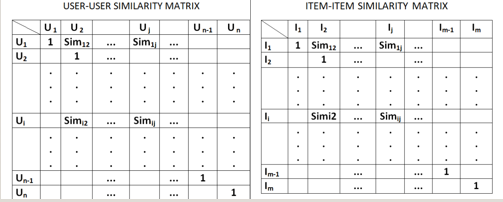

圖片來源：https://ithelp.ithome.com.tw/articles/10219511

第一段代碼不對分析結果進行評估，我們可以輸入一個用戶id，之後會依據相似度，給他推薦他可能喜歡的10部電影。
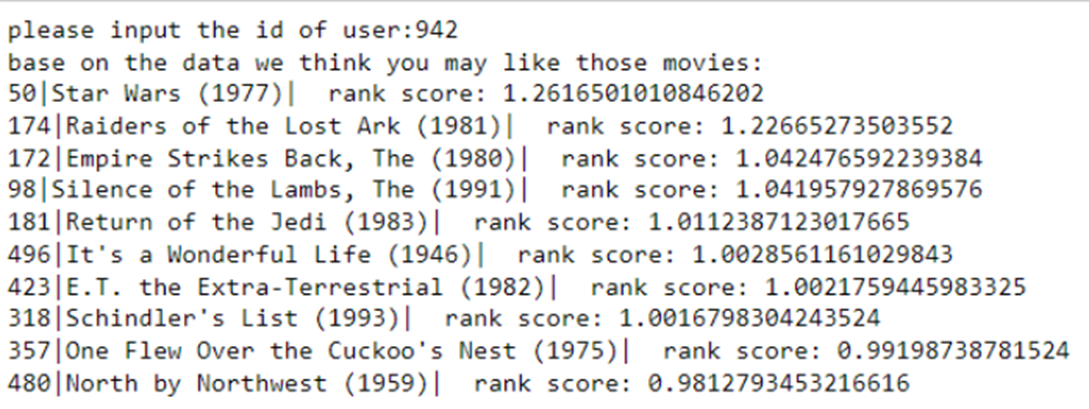


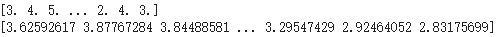

上方圖片是第二段代碼運行後得到的u3.base的預測值，將預測值跟u3.test用RMSE評估。

我用u1-4.base and u1-4.test預測評估後可以得到下面這張圖表。我們可以得到下方圖表。
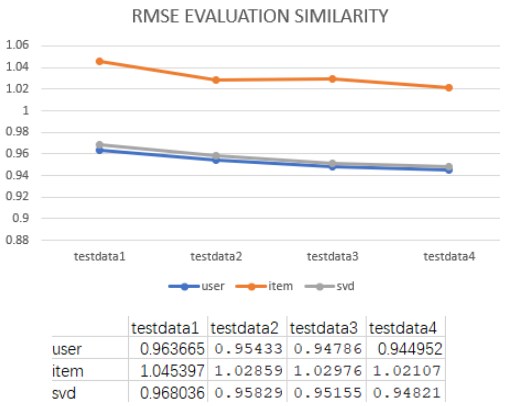

在這張圖表裏，我發現item-base預測值的均方差根會偏大，item-base 跟 user-base本身只是矩陣倒轉就能互相計算相似度。

我們分析會造成item-base中RMSE較大的原因可能是item的數據量足夠大，但是user數據量較少造成的。

或者是每個user對各個item的評分數量極度不平均。



第二段代碼後半部分使用了奇異值分解（Singular_Value_Decomposition）。
進行RMSE評估其預測值後發現，SVD的均方根誤差跟userbase的相似。

In [ ]:
import numpy as np
import math

def loadData():
    f = open('u.data')
    data = []
    for i in range(100000):
        h = f.readline().split('\t')
        h = list(map(int, h))
        data.append(h[0:3])
    f.close()
    return data

def loadMovieName():
    f=open('u.item',encoding='ISO-8859-1')
    name = []
    for i in range(1682):
        h = f.readline()
        k=''
        m=0
        for j in range(100):
            k+=str(h[j])
            if str(h[j])=='|':
                m+=1
            if m==2:
                break
        name.append(k)
    f.close()
    return name


def manageDate(data):
    outdata = []
    for i in range(943):
        outdata.append([])
        for j in range(1682):
            outdata[i].append(0)
    for h in data:
        outdata[h[0] - 1][h[1] - 1] = h[2]
    return outdata


def calcMean(x, y):
    sum_x = sum(x)
    sum_y = sum(y)
    n = len(x)
    x_mean = float(sum_x + 0.0) / n
    y_mean = float(sum_y + 0.0) / n
    return x_mean, y_mean


def calcPearson(x, y):
    x_mean, y_mean = calcMean(x, y)  # 計算x，y向量平均值
    n = len(x)
    sumTop = 0.0
    sumBottom = 0.0
    x_pow = 0.0
    y_pow = 0.0
    for i in range(n):
        sumTop += (x[i] - x_mean) * (y[i] - y_mean)
    for i in range(n):
        x_pow += math.pow(x[i] - x_mean, 2)
    for i in range(n):
        y_pow += math.pow(y[i] - y_mean, 2)
    sumBottom = math.sqrt(x_pow * y_pow)
    p = sumTop / sumBottom
    return p


def calcAttribute(dataSet, num):
    prr = []
    n, m = np.shape(dataSet)  # 獲取行列數
    x = [0] * m  # 初始化特徵向量
    y = [0] * m
    y = dataSet[num - 1]
    for j in range(n):  # 獲取每個向量，並計算皮爾森係數
        x = dataSet[j]
        prr.append(calcPearson(x, y))
    return prr


def choseMovie(outdata, num):
    prr = calcAttribute(outdata, num)
    list=[]
    mid=[]
    out_list=[]
    movie_rank=[]
    for i in range(1682):
        movie_rank.append([i,0])
    k=0
    for i in range(943):
        list.append([i,prr[i]])
    for i in range(943):
        for j in range(942-i):
            if list[j][1]<list[j+1][1]:
                mid=list[j]
                list[j]=list[j+1]
                list[j+1]=mid
    for i in range(1,51):
        for j in range(0,1682):
            movie_rank[j][1]=movie_rank[j][1]+outdata[list[i][0]][j]*list[i][1]/50
    for i in range(1682):
        for j in range(1681-i):
            if movie_rank[j][1]<movie_rank[j+1][1]:
                mid=movie_rank[j]
                movie_rank[j]=movie_rank[j+1]
                movie_rank[j+1]=mid
    for i in range(1,1682):
        if(outdata[num-1][movie_rank[i][0]]==0):
            mark=0
            for d in out_list:
                if d[0]==j:
                        mark=1
                if mark!=1:
                    k+=1
                    out_list.append(movie_rank[i])
            if k==10:
                break
    return movie_rank

def printMovie(out_list,name):
    print("you may like those movies:")
    for i in range(10):
        print(name[out_list[i][0]]," rank score:",out_list[i][1])

i_data = loadData()
name = loadMovieName()
out_data = manageDate(i_data)
a = eval(input("please input the id of user:"))
out_list = choseMovie(out_data, a)
printMovie(out_list,name)

please input the id of user:942
you may like those movies:
50|Star Wars (1977)|  rank score: 1.2616501010846202
174|Raiders of the Lost Ark (1981)|  rank score: 1.22665273503552
172|Empire Strikes Back, The (1980)|  rank score: 1.042476592239384
98|Silence of the Lambs, The (1991)|  rank score: 1.041957927869576
181|Return of the Jedi (1983)|  rank score: 1.0112387123017665
496|It's a Wonderful Life (1946)|  rank score: 1.0028561161029843
423|E.T. the Extra-Terrestrial (1982)|  rank score: 1.0021759445983325
318|Schindler's List (1993)|  rank score: 1.0016798304243524
357|One Flew Over the Cuckoo's Nest (1975)|  rank score: 0.99198738781524
480|North by Northwest (1959)|  rank score: 0.9812793453216616


In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import math
from math import sqrt
import matplotlib.pyplot as plt
'''
Collaborative Filter, Similarity , item-base,user-base,svd
'''
folder = ""
class Similarity:
    def __init__(self, data = None, test = None):
        if data is not None and test is not None:
            self.data = data
            self.test = test
            maxs = self.data.max(0)
            self.nu = int(maxs[0] + 1)
            self.ni = int(maxs[1] + 1)
            self.sim = None
            self.den1 = None
            self.den2 = None
            self.user_bias = None
            self.calculateBias()

    def calculateBias(self):
        self.user_bias = np.zeros(self.nu)
        self.user_count = np.zeros(self.nu)
        dataLength = len(self.data)
        for iter in range(dataLength):
            u = int(self.data[iter, 0])
            r = int(self.data[iter, 2])
            self.user_bias[u] += r
            self.user_count[u] += 1
        self.user_bias /= np.where(self.user_count == 0, 1, self.user_count)
    #calculate by user-base using Pearson Similarity
    def calcSimiMatrix(self):
        mat = np.zeros((self.nu, self.ni))
        for i in range(len(self.data)):
            currentData = self.data[i, :]
            user, item , rating = int(currentData[0]), int(currentData[1]), currentData[2]
            mat[user, item] = rating
        matSim = np.zeros((self.nu, self.nu))
        for u1 in range(self.nu):
            for u2 in range(u1, self.nu):
                currentSim = np.corrcoef(mat[u1, :], mat[u2, :])
                currentSim = currentSim[0,1]
                matSim[u1, u2] = currentSim
                matSim[u2, u1] = currentSim
        self.sim = matSim

    def calcSimi(self):
        sim = np.zeros((self.nu, self.nu))
        den1 = np.zeros((self.nu, self.nu))
        den2 = np.zeros((self.nu, self.nu))
        for i in range(1, self.ni):
            if (i % 100 == 0):
                print(i)
            subdata = self.data[self.data[:, 1] == i, :]
            n = subdata.shape[0]
            for i1 in range(n):
                for i2 in range(i1, n):
                    u1 = subdata[i1, 0]
                    u2 = subdata[i2, 0]
                    r1 = subdata[i1, 2]
                    r2 = subdata[i2, 2]
                    v1 = r1 - self.user_bias[u1]
                    v1s = v1 ** 2
                    v2 = r2 - self.user_bias[u2]
                    v2s = v2 ** 2
                    simV = v1 * v2
                    sim[u1, u2] += simV
                    sim[u2, u1] += simV
                    den1[u1, u2] += v1s
                    den1[u2, u1] += v1s
                    den2[u1, u2] += v2s
                    den2[u2, u1] += v2s
        self.sim = sim / np.maximum(np.sqrt(den1) * np.sqrt(den2), 1)
        self.den1 = den1
        self.den2 = den2

    def saveSimi(self, n):
        sim_file = open(folder + "sim" + str(n) + ".pickle", 'wb')
        user_bias_file = open(folder + "user_bias" + str(n) + ".pickle", 'wb')
        den1_file = open(folder + "den1" + str(n) + ".pickle", 'wb')
        den2_file = open(folder + "den2" + str(n) + ".pickle", 'wb')
        if self.sim is not None:
            pickle.dump(self.sim, sim_file)
        if self.user_bias is not None:
            pickle.dump(self.user_bias, user_bias_file)
        if self.den1 is not None:
            pickle.dump(self.den1, den1_file)
        if self.den2 is not None:
            pickle.dump(self.den2, den2_file)
        sim_file.close()
        user_bias_file.close()
        den1_file.close()
        den2_file.close()

    def loadSimi(self, n):
        sim_file = open(folder + "sim" + str(n) + ".pickle", 'rb')
        user_bias_file = open(folder + "user_bias" + str(n) + ".pickle", 'rb')
        den1_file = open(folder + "den1" + str(n) + ".pickle", 'rb')
        den2_file = open(folder + "den2" + str(n) + ".pickle", 'rb')
        try:
            self.sim = pickle.load(sim_file)
            self.user_bias = pickle.load(user_bias_file)
            self.den1 = pickle.load(den1_file)
            self.den2 = pickle.load(den2_file)
        except:
            pass
        sim_file.close()
        user_bias_file.close()
        den1_file.close()
        den2_file.close()

    def predict(self, threshold = 0, testData = None):
        if testData is not None:
            self.test = testData
        answers = self.test[:, 2]
        testSize = len(answers)
        predicts = np.zeros(testSize)
        for i in range(testSize):
            user = int(self.test[i, 0])
            item = int(self.test[i, 1])
            subdata = self.data[self.data[:, 1] == item, :]
            subdataSize = len(subdata)
            predicts[i] += self.user_bias[user]
            sim_divisor = 0
            sim_dividen = 0
            for j in range(subdataSize):
                currentUser = int(subdata[j, 0])
                currentSim = self.sim[user, currentUser]
                if (math.fabs(currentSim) < threshold):
                    continue
                sim_divisor += math.fabs(currentSim)
                sim_dividen += currentSim * (subdata[j, 2] - self.user_bias[currentUser])
            if (sim_divisor != 0):
                predicts[i] += sim_dividen / sim_divisor
                if (predicts[i] < 1):
                    predicts[i] = 1
                elif (predicts[i] > 5):
                    predicts[i] = 5
        return answers, predicts


class Similarity_item:
    def __init__(self, fdata = None, ftest = None):
        if fdata is not None and ftest is not None:
            self.data = np.loadtxt(fdata)
            self.test = np.loadtxt(ftest)
            maxs = self.data.max(0)
            self.nu = int(maxs[0] + 1)
            self.ni = int(maxs[1] + 1)
            self.sim = None
            self.den1 = None
            self.den2 = None
            self.user_bias = None
            self.calculateBiais()
    #
    def calculateBiais(self):
        self.item_bias = np.zeros(self.ni)
        self.item_count = np.zeros(self.ni)
        dataLength = len(self.data)
        for iter in range(dataLength):
            u = int(self.data[iter, 1])
            r = int(self.data[iter, 2])
            self.item_bias[u] += r
            self.item_count[u] += 1
        self.item_bias /= np.where(self.item_count == 0, 1, self.item_count)
    
    #calculate by item-base
    def calcSimiMatrix_item(self):
        mat = np.zeros((self.ni, self.nu))
        for i in range(len(self.data)):
            currentData = self.data[i, :]
            user, item , rating = int(currentData[0]), int(currentData[1]), currentData[2]
            mat[item, user] = rating
        matSim = np.zeros((self.ni, self.ni))
        for u1 in range(self.ni):
            for u2 in range(u1, self.ni):
                #mU1 = mat[u1,]
                currentSim = calcSim(mat[u1, :], mat[u2, :], self.item_bias[u1], self.item_bias[u2])
                #currentSim = calcSim(mat[u1, :], mat[u2, :])
                matSim[u1, u2] = currentSim
                matSim[u2, u1] = currentSim
        self.sim = matSim

    def predict(self, threshold = 0.0, testData = None):
        if testData is not None:
            self.test = testData
        answer = self.test[:, 2]
        testSize = len(answer)
        predicts = np.zeros(testSize)
        for i in range(testSize):
            user = int(self.test[i, 0])
            item = int(self.test[i, 1])
            subdata = self.data[self.data[:, 0] == user, :]
            subdataSize = len(subdata)
            predicts[i] += self.item_bias[item]
            sim_divisor = 0
            sim_dividen = 0
            for j in range(subdataSize):
                currentItem = int(subdata[j, 1])
                currentSim = self.sim[item, currentItem]
                if (math.fabs(currentSim) < threshold):
                    continue
                sim_divisor += math.fabs(currentSim)
                sim_dividen += currentSim * (subdata[j, 2] - self.item_bias[currentItem])
            if (sim_divisor != 0):
                predicts[i] += sim_dividen / sim_divisor
                if (predicts[i] <= 0):
                    predicts[i] = 0
                elif (predicts[i] > 5):
                    predicts[i] = 5
        return answer, predicts

class SVD:
    def __init__(self, data = None, test = None):
        if data is not None and test is not None:
            self.data = data
            self.test = test
            maxs = self.data.max(0)
            self.nu = int(maxs[0] + 1)
            self.ni = int(maxs[1] + 1)
            self.calculateBiais()

    def calculateBiais(self):
        self.user_bias = np.zeros(self.nu)
        self.user_count = np.zeros(self.nu)
        dataLength = len(self.data)
        for iter in range(dataLength):
            u = int(self.data[iter, 0])
            r = int(self.data[iter, 2])
            self.user_bias[u] += r
            self.user_count[u] += 1
        self.user_bias /= np.where(self.user_count == 0, 1, self.user_count)

    def generaterMat(self):
        self.mat = np.zeros((self.nu, self.ni))
        dataSize = len(self.data)
        for i in range(dataSize):
            currentLine = self.data[i, :]
            user = int(currentLine[0])
            item = int(currentLine[1])
            rating = currentLine[2]
            self.mat[user, item] = rating

    def calcSVD(self, threshold = None):
        if (threshold is None):
            threshold = 0.95
        U, Sigma, VT = np.linalg.svd(self.mat)
        self.U = U
        self.Sigma = np.zeros(self.mat.shape)
        for i in range(Sigma.shape[0]):
            self.Sigma[i, i] = Sigma[i]
        self.VT = VT

        sigma2 = Sigma ** 2
        threshold *= sum(sigma2)
        currentSum = 0
        adjustSize = Sigma.shape[0]
        for i in range(Sigma.shape[0]):
            currentSum += sigma2[i]
            if (currentSum > threshold):
                adjustSize = i
                break
        adjustSigma = np.mat(np.eye(adjustSize) * Sigma[:adjustSize])
        xFormedUsers = (self.mat.dot(VT[:, :adjustSize])).dot(adjustSigma.I)
        self.matSVD = xFormedUsers
        sim = np.zeros((self.nu, self.nu))
        for u1 in range(1, self.nu):
            for u2 in range(u1, self.nu):
                currentSim = np.corrcoef(xFormedUsers[u1, :], xFormedUsers[u2, :])
                sim[u1, u2] = currentSim[0,1]
                sim[u2, u1] = currentSim[0,1]
        self.sim = sim


    def predict(self, threshold = 0, testData = None):
        if testData is not None:
            self.test = testData
        answer = self.test[:, 2]
        testSize = len(answer)
        predicts = np.zeros(testSize)


        for i in range(testSize):
            user = int(self.test[i, 0])
            item = int(self.test[i, 1])
            predicts[i] = self.user_bias[user]
            subdata = self.data[self.data[:, 1] == item, :]
            subdataSize = len(subdata)
            sim_divisor = 0
            sim_dividen = 0
            for j in range(subdataSize):
                currentUser = int(subdata[j, 0])
                currentSim = self.sim[user, currentUser]
                if (math.fabs(currentSim) < threshold):
                    continue
                sim_divisor += math.fabs(currentSim)
                sim_dividen += currentSim * (subdata[j, 2] - self.user_bias[currentUser])
            if (sim_divisor != 0):
                predicts[i] += sim_dividen / sim_divisor
            if (predicts[i] < 1):
                predicts[i] = 1
            elif (predicts[i] > 5):
                predicts[i] = 5
        print(answer)
        print(predicts)
        return answer, predicts


def loadItemInfo(pickleFile = None):
    if (pickleFile is None):
        pickleFile = "itemInfo.pickle"
    return pickle.load(open(pickleFile, 'rb'))

def loadBias():
    fdata = "u4.base"
    data = np.loadtxt(fdata)
    userBias = UserBias(data)
    userBias.generateBias()
    return userBias

def evaluationRMSE(data1, data2):
    if (len(data1) != len(data2)):
        raise("Length not equal")
    dataSize = len(data1)
    if (dataSize == 0):
         raise("Data is empty")
    data1 = np.mat(data1)
    if (data1.shape[1] != 1):
        data1 = data1.T
    data2 = np.mat(data2)
    if (data2.shape[1] != 1):
        data2 = data2.T

    diff = data1 - data2
    diff = diff.T * diff
    #print(diff.shape)
    return sqrt(diff.sum() / dataSize)


def calcSim(p1, p2, p1av = None, p2av = None):
    p1 = np.where(p2 == 0, 0, p1)
    p2 = np.where(p1 == 0, 0, p2)
    numCommon = np.where(p1 == 0, 0, 1)
    if (numCommon.sum() < 2):
        return 0
    if (len(p1) < 2):
        return 0
    if (p1av is not None):
        p1 = np.where(p1 == 0, 0, p1 - p1av)
    if (p2av is not None):
        p2 = np.where(p2 == 0, 0, p2 - p2av)
    num = p1.dot(p2.T)
    denom = np.linalg.norm(p1) * np.linalg.norm(p2)
    if (denom == 0):
        return 0
    return num / denom

def test_sim_user():
    fdata = "u4.base"
    ftest = "u4.test"
    simi = Similarity(np.loadtxt(fdata), np.loadtxt(ftest))
    simi.calcSimiMatrix()
    simi.saveSimi(10)
    answer, predicts = simi.predict()
    err = evaluationRMSE(answer, predicts)
    print("Error_similarity_user: %f" % err)

def test_sim_item():
    fdata = "u4.base"
    ftest = "u4.test"
    simi = Similarity_item(fdata, ftest)
    simi.calcSimiMatrix_item()
    answer, predicts = simi.predict()
    err = evaluationRMSE(answer, predicts)
    print("Error_similarity_item: %f" % err)

def test_SVD():
    fdata = "u4.base"
    ftest = "u4.test"
    svd = SVD(np.loadtxt(fdata), np.loadtxt(ftest))
    svd.generaterMat()
    svd.calcSVD()
    answer, predicts = svd.predict()
    err = evaluationRMSE(answer, predicts)
    print("Error_SVD: %f" % err)

if __name__ == '__main__':
    test_sim_user()
    test_sim_item()
    #test_SVD()

Error_similarity_user: 0.944952
Error_similarity_item: 0.949706
[3. 4. 5. ... 2. 4. 3.]
[3.62592617 3.87767284 3.84488581 ... 3.29547429 2.92464052 2.83175699]
Error_SVD: 0.948208


參考資料：
https://chriskang028.medium.com/%E6%B7%B1%E5%85%A5%E6%B7%BA%E5%87%BA%E5%B8%B8%E7%94%A8%E6%8E%A8%E8%96%A6%E7%B3%BB%E7%B5%B1%E6%BC%94%E7%AE%97%E6%B3%95-recommendation-system-42f2437e3e9a
https://medium.com/ai-academy-taiwan/svd-%E5%AF%A6%E4%BD%9C%E6%8E%A8%E8%96%A6%E7%B3%BB%E7%B5%B1-f90f98b9831b
https://ithelp.ithome.com.tw/articles/10219511
https://github.com/geeky-bit/Recommendation_systems-using-SVD-KNN-etc/blob/master/Singular_Value_Decomposition.py

# item based

In [ ]:
# Item Based
# need u.data and u.item

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import pairwise_distances

# load the movie rating data into a dataframe
rating_header = ["user_id", "item_id", "rating", "timestamp"]
rating = pd.read_csv("u.data", sep = '\t', header = None, names=rating_header)

# load movie data into a dataframe
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv("u.item", sep = '|', header = None, encoding = 'latin1', names = movie_header)
# remove the video release date (no values)
movies = movies.drop(columns=['video_release_date'])
movies.head()

#put all rate in to the matrix of user id and item id
ratings_matrix = rating.pivot_table(index=['item_id'],columns=['user_id'],values='rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True ) #fill the unrated to 0
print(ratings_matrix.shape)
print(ratings_matrix)
print(" ")

# similarity
movie_similarity =  metrics.pairwise_distances( ratings_matrix, metric="euclidean" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
print(movie_similarity.shape)
print(movie_similarity)
print(" ")


# ********user input the movie*********
user_Input="8 Heads in a Duffel Bag (1997)"  



Temp=0
Max=1000
Min=0
#find top five movie to recommand
for j in range(1682):
  if(user_Input==movies.iat[j,1]):
    print(movies.iat[j,1])
    print("recommand you these five movies")
    print(" ")

    for i in range (1682):
      if(movie_similarity[i][j]<Max and movie_similarity[i][j]>0 ):      
        Max=movie_similarity[i][j]  # first movie to recommand
        Temp=i
    print('similarity', ' ',Max)
    print(movies.iat[Temp,1])
    print(" ")

    for l in range (4):  #the other four movies
      Min = 1000

      for q in range(1682):
        if(movie_similarity[q][j]>Max and movie_similarity[q][j]>0 and  movie_similarity[i][j]<Min):  
          Min =movie_similarity[q][j]
          Temp=q
      Max = Min
      print('similarity',' ',Max)
      print(movies.iat[Temp,1])
      print(" ")
        


(1682, 943)
user_id  1    2    3    4    5    6    7    8    9    10   ...  934  935  936  \
0        5.0  4.0  0.0  0.0  4.0  4.0  0.0  0.0  0.0  4.0  ...  2.0  3.0  4.0   
1        3.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  0.0  0.0   
2        4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  4.0   
3        3.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  ...  5.0  0.0  0.0   
4        3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1677     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1678     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1679     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1680     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1681     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

user_id  937  9